In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [14]:
room_temp = ctrl.Antecedent(np.arange(0, 40, 1), "room_temp")
target_temp = ctrl.Antecedent(np.arange(0, 40, 1), "target_temp")
action = ctrl.Antecedent(np.arange(-5, 5, 1), "action")

In [15]:
room_temp["very_cold"] = fuzz.gaussmf(room_temp.universe, 0, 1.2)
room_temp["cold"] = fuzz.gaussmf(room_temp.universe, 10, 1.2)
room_temp["warm"] = fuzz.gaussmf(room_temp.universe, 20, 1.2)
room_temp["hot"] = fuzz.gaussmf(room_temp.universe, 30, 1.2)
room_temp["very_hot"] = fuzz.gaussmf(room_temp.universe, 40, 1.2)

In [16]:
target_temp["very_cold"] = fuzz.gaussmf(target_temp.universe, 0, 1.2)
target_temp["cold"] = fuzz.gaussmf(target_temp.universe, 10, 1.2)
target_temp["warm"] = fuzz.gaussmf(target_temp.universe, 20, 1.2)
target_temp["hot"] = fuzz.gaussmf(target_temp.universe, 30, 1.2)
target_temp["very_hot"] = fuzz.gaussmf(target_temp.universe, 40, 1.2)

In [23]:
action["cold"] = fuzz.gaussmf(action.universe, -5, 2)
action["no_change"] = fuzz.gaussmf(action.universe, 0, 1)
action["heat"] = fuzz.gaussmf(action.universe, 5, 2)

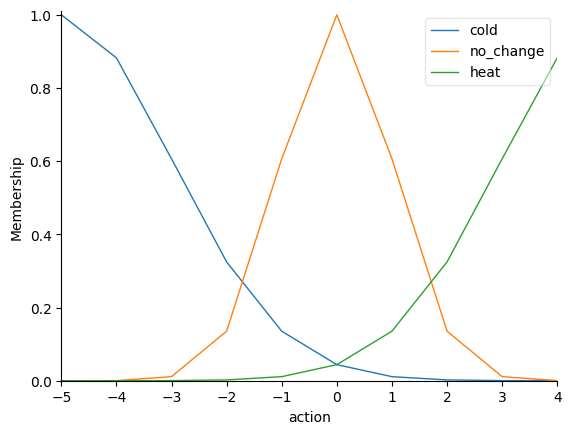

In [25]:
action.view()

In [ ]:
rule1 = ctrl.Rule(room_temp == target_temp, action["no_change"])
rule2 = ctrl.Rule(room_temp["very_cold"] | target_temp["cold"], action["heat"])